# 实验环境配置及基础编程训练

## 目录

- 实验配置补充说明
- Python 基础操作
  - Numpy
  - Matplotlib
- PyTorch 基础操作
  - 基础数据操作
- 数据预处理
- 查阅文档
- 线性代数

## 实验配置补充说明

### 命令行

基础安装配置已在另一单独文档讲解，如果能正常运行到这里，说明实验环境已经基本配置成功了。

即使之后的实验提示缺乏必要的软件包，也可以在 `JupyterLab` 集成的命令行终端中补充安装。

> 注意：任何在 `JupyterLab` 集成的命令行终端中补充安装的软件包都会被安装到与启动 `JupyterLab` 相同的环境中。

具体操作步骤：

1. `File -> New -> Terminal`；或 `File -> New Launcher`，然后选择 `Terminal`
2. 正常使用命令行工具更改运行环境

### 笔记中调用命令

在Jupyter笔记本文件中也是可以直接调用终端命令的，例如查看当前环境的Python版本：

In [1]:
!python --version

Python 3.8.16


### 调试器

JupyterLab也集成了调试器：使用前需要先点击右上的`Enable Debugger`按钮。

然后可以正常使用设置断点、单步执行、查看变量等操作。

## Python 基础操作

Python本身是一种强大的通用编程语言，但在一些流行的库（`numpy`、`scipy`、`matplotlib`）的帮助下，它成为一种更加强大的科学计算环境。

我们希望你们中的许多人对`Python`和`numpy`有一些经验；对于其余的人，本节将作为`Python`编程语言和`Python`在科学计算中的应用的快速入门课程。

Python是一种高级的、动态类型的多范式编程语言。人们常说Python代码几乎就是伪代码，因为它允许你用很少的几行代码来表达非常强大的思想，同时又非常可读。

### 基础数据类型

#### 数值型

整数和浮点数的工作方式与其他语言几乎一样。

In [2]:
x = 3
print(x, type(x))

3 <class 'int'>


In [3]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation

4
2
6
9


In [4]:
x += 1
print(x)
x *= 2
print(x)

4
8


In [5]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


注意，与许多语言不同，Python 没有单数增量 (`x++`) 或减量 (`x--`) 操作符。

Python 也有长整数和复数的内置类型；如有疑问，可查看[文档细节](https://docs.python.org/zh-cn/3.11/library/stdtypes.html#numeric-types-int-float-long-complex)。


#### 布尔型

Python 实现了布尔逻辑的所有常用运算符，但使用英文单词而不是符号 (`&&`, `||`, 等等)。

In [6]:
t, f = True, False
print(type(t))

<class 'bool'>


现在我们来看看这些操作：

In [7]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### 字符串

字符串不区分单引号或双引号：

In [8]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

hello 5


字符串拼接：

In [9]:
hw = hello + ' ' + world  # String concatenation
print(hw)

hello world


In [10]:
hw12 = '{} {} {}'.format(hello, world, 12)  # string formatting
print(hw12)

hello world 12


最新版Python里（3.7以上）推荐使用“f-string”格式化字符串：

In [11]:
print(f'{hello}, {world} {12}')

hello, world 12


字符串对象有很多有用的方法；例如：

In [12]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


你可以在[文档](https://docs.python.org/zh-cn/3.11/library/stdtypes.html#string-methods)中找到所有字符串方法的列表。

### 容器

Python 包括几种内置的容器类型：列表、字典、集合和图元。

#### 列表

列表相当于数组，但是可以调整大小，并且可以包含不同类型的元素。

In [13]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [14]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [15]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 'bar']


In [16]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


像往常一样，你可以在[文档](https://docs.python.org/zh-cn/3.11/tutorial/datastructures.html#more-on-lists)中找到关于列表的所有细节。

#### 数据切片

除了每次访问列表元素之外，Python 还提供了简洁的语法来访问子列表；这被称为切片。

In [17]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### 遍历

遍历列表元素在Python中也非常简洁：

In [18]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


如果你想访问一个循环体内每个元素的索引，请使用内置的`enumerate`函数。

In [19]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### 列表理解

在编程时，我们经常想把一种类型的数据转换成另一种类型的数据。作为一个简单的例子，考虑以下计算平方数的代码。

In [20]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


你可以用列表理解法使这段代码更简单。

In [21]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


列表理解也可以包含条件：

In [22]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


### 字典

`dictionary` 存储对 `(key, value)`，类似于 Java 中的 `Map` 或 Javascript 中的对象。

In [23]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [24]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [31]:
import traceback
try:
    print(d['monkey'])  # KeyError: 'monkey' not a key of d
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/zv/bzxgq5_j5f9gkpm84rg80kph0000gn/T/ipykernel_31837/1743455973.py", line 3, in <module>
    print(d['monkey'])  # KeyError: 'monkey' not a key of d
KeyError: 'monkey'


In [32]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [33]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


遍历字典中的关键字：

In [34]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


字典理解与列表理解类似，但允许你轻松构建字典：

In [35]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


你可以在[文档](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)中找到所有你需要知道的关于字典的信息。

#### 集合

集合是一个由不同元素组成的无序集合。

In [36]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


True
False


In [37]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [38]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       

3
2


循环：对集合进行迭代的语法与对列表进行迭代的语法相同；但是由于集合是无序的，你不能对访问集合中的元素的顺序做出假设。

In [39]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: fish
#2: dog
#3: cat


集合理解：像列表和字典一样，我们可以用集合理解法轻松地构建集合。

In [40]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


#### 元组

元组是一个（不可变的）有序的数值列表。元组在许多方面与列表相似；最重要的区别之一是，元组可以作为字典的键和集合的元素，而列表则不能。

In [41]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [43]:
import traceback
try:
    t[0] = 1 # TypeError: 'tuple' object does not support item assignment
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/zv/bzxgq5_j5f9gkpm84rg80kph0000gn/T/ipykernel_31837/743935956.py", line 3, in <module>
    t[0] = 1 # TypeError: 'tuple' object does not support item assignment
TypeError: 'tuple' object does not support item assignment


### 函数

Python 函数是用 `def` 关键字定义的。

In [44]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


我们可以像这样定义函数来接受可选的关键字参数。

In [45]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### 类

在Python中定义类的语法与其他面向对象语言类似。

In [46]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


## Numpy

Numpy是Python中科学计算的核心库。它提供了一个高性能的多维数组对象，以及处理这些数组的工具。

要使用Numpy，我们首先需要导入`numpy`包。

In [47]:
import numpy as np

### 数组

numpy数组是一个由数值组成的网格，所有的数值都是相同的类型，并由一个非负整数的元组来索引。维数的数量是数组的等级；数组的形状是一个整数的元组，给出数组在每个维度上的大小。

我们可以从嵌套的Python列表中初始化numpy数组，并使用方括号访问元素。

In [48]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [49]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [50]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy还提供了许多创建数组的函数。

In [51]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [52]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [53]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [54]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [55]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.00480263 0.8985954 ]
 [0.19113444 0.57867786]]


### 数组索引

切片：与Python列表类似，numpy数组可以被切片。由于数组可能是多维的，你必须为数组的每个维度指定一个分片。

In [56]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


一个数组的片断是对同一数据的视图，所以修改它将修改原始数组。

In [57]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


你也可以把整数索引和片断索引混合起来。但是，这样做会产生一个比原数组秩更低的数组。

In [58]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


访问数组中间行的数据的两种方法。将整数索引与分片混合使用会产生一个较低秩的数组，而只使用分片会产生一个与原数组秩相同的数组。

In [59]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [60]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


整数阵列的索引：当你使用切片法对numpy数组进行索引时，产生的数组视图总是原始数组的一个子数组。相比之下，整数数组索引允许你使用另一个数组的数据来构造任意的数组。

In [61]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [62]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


整数数组索引的一个有用的技巧是从矩阵的每一行中选择或改变一个元素。


In [63]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [64]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [65]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


布尔数组索引：布尔数组索引可以让你挑选出一个数组中的任意元素。这种类型的索引经常被用来选择一个数组中满足某些条件的元素。

In [66]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [67]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


为了简洁起见，我们省略了很多关于numpy数组索引的细节；如果你想知道更多，你应该阅读文档。

### 数据类型

每个numpy数组都是由相同类型的元素组成的网格。Numpy提供了一大批数字数据类型，你可以用它们来构造数组。当你创建一个数组时，Numpy会尝试猜测一个数据类型，但是构造数组的函数通常也包括一个可选参数来明确指定数据类型。

In [68]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


你可以在[文档](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)中阅读关于numpy数据类型的所有信息。

### 数组的数学运算

基本数学函数对数组进行元素操作，既可以作为运算符重载，也可以作为numpy模块的函数。

In [69]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [70]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [71]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [72]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [73]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


注意，与MATLAB不同，`*`是元素乘法，而不是矩阵乘法。我们使用`dot`函数来计算向量的内积，用一个向量乘以一个矩阵，以及乘以矩阵。

In [74]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


你也可以使用`@`运算符，它等同于numpy的`dot`运算符。

In [75]:
print(v @ w)

219


In [76]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [77]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy提供了许多有用的函数来对数组进行计算，其中最有用的一个是`sum`。

In [78]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


除了使用数组计算数学函数外，我们还经常需要对数组中的数据进行重塑或其他操作。这类操作的最简单例子是转置矩阵；要转置矩阵，只需使用数组对象的`T`属性。

In [79]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [80]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


### 广播

广播是一种强大的机制，它允许numpy在进行算术运算时与不同形状的数组一起工作。通常我们有一个较小的数组和一个较大的数组，我们想多次使用较小的数组来对较大的数组进行一些操作。

例如，假设我们想给一个矩阵的每一行添加一个常数向量。

In [81]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这个方法是可行的；但是当矩阵`x`非常大时，在Python中计算一个显式循环可能会很慢。请注意，将向量`v`添加到矩阵`x`的每一行，相当于通过垂直堆叠多个副本形成矩阵`vv`，然后对`x`和`vv`进行元素求和。 我们可以这样实现这个方法。

In [82]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [83]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy广播允许我们在不实际创建`v`的多个副本的情况下进行这种计算。

In [84]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


尽管x的形状是(4, 3)，而v的形状是(3,)，但由于广播的原因，这行代码`y = x + v`是有效的；这行代码的作用就像v实际上有形状(4, 3)一样，其中每一行都是v的一个副本，并且按元素进行求和。

两个数组一起广播时要遵循这些规则。

1. 如果数组没有相同的秩，则在低秩数组的形状前加上1，直到两个形状具有相同的长度。
2. 如果两个数组在某一维度上有相同的大小，或者其中一个数组在该维度上有1的大小，则称这两个数组在该维度上兼容。
3. 如果这两个数组在所有维度上都是兼容的，就可以一起广播。
4. 在广播之后，每个数组的行为就像它的形状等于两个输入数组形状的元素最大值一样。
5. 在任何一个维度上，如果一个数组的大小为1，而另一个数组的大小大于1，那么第一个数组的行为就像是沿着该维度复制的一样

尝试阅读[文档](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)中的解释来理解。

支持广播的函数被称为通用函数。你可以在[文档](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)中找到所有通用函数的列表。

下面是广播的一些应用。

In [85]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [86]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [87]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [88]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [89]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


广播通常会使你的代码更加简洁和快速，所以你应该尽可能地使用它。

## Matplotlib

Matplotlib是一个绘图库。在本节中简要介绍`matplotlib.pyplot`模块，它提供了一个类似于MATLAB的绘图系统。

In [90]:
import matplotlib.pyplot as plt

> 注意：通过运行这个特殊的iPython命令，我们将内联显示图画。

In [91]:
%matplotlib inline

### `plot`绘图

`matplotlib`中最重要的函数是`plot`，它允许你绘制2D数据。下面是一个简单的例子。

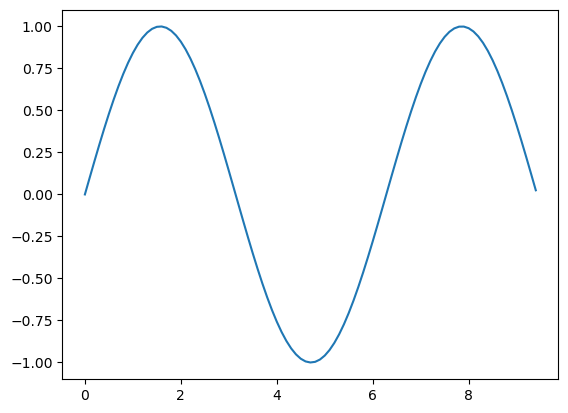

In [92]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

只需做一点额外的工作，我们就可以很容易地一次绘制多条线，并添加一个标题、图例和轴标签。

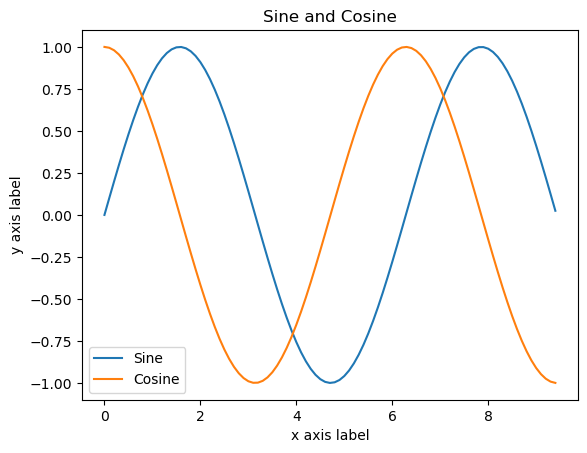

In [93]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### `subplots` 绘图

你可以使用subplot函数在同一个图中绘制一组不同的图形。下面是一个例子。

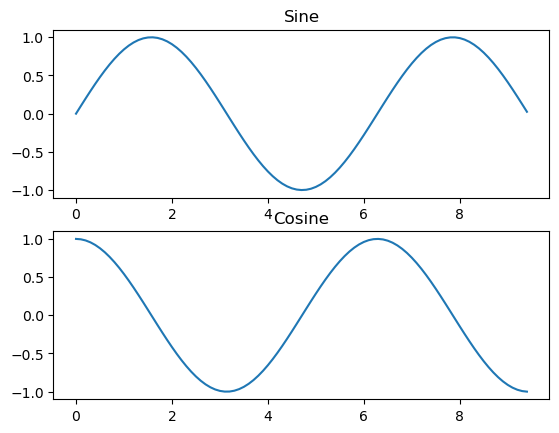

In [94]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

## PyTorch 基础操作

首先，我们导入`torch`。请注意，虽然它被称为PyTorch，但是代码中使用`torch`而不是`pytorch`

In [95]:
import torch

### 基础数据操作

张量表示由一个数值组成的数组，这个数组可能有多个维度

In [96]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以通过张量的`shape`属性来访问张量（沿每个轴的长度）的*形状*
和张量中元素的总数

In [97]:
x.shape

torch.Size([12])

In [98]:
x.numel()

12

要想改变一个张量的形状而不改变元素数量和元素值，可以调用`reshape`函数

In [99]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

使用全0、全1、其他常量，或者从特定分布中随机采样的数字

In [100]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [101]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [102]:
torch.randn(3, 4)

tensor([[-1.6135,  0.3384, -0.1105, -0.2204],
        [ 1.8458,  1.0330,  1.3026, -1.9075],
        [-0.9892, -1.4300,  0.3078, -0.5878]])

通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值

In [103]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

常见的标准算术运算符（`+`、`-`、`*`、`/`和`**`）都可以被升级为按元素运算

In [104]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

“按元素”方式可以应用更多的计算

In [105]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

我们也可以把多个张量*连结*（concatenate）在一起

In [106]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor(
    [[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

通过*逻辑运算符*构建二元张量

In [107]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

对张量中的所有元素进行求和，会产生一个单元素张量

In [108]:
X.sum()

tensor(66.)

即使形状不同，我们仍然可以通过调用
*广播机制*（broadcasting mechanism）来执行按元素操作

In [109]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [110]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

可以用`[-1]`选择最后一个元素，可以用`[1:3]`选择第二个和第三个元素

In [111]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

除读取外，我们还可以通过指定索引来将元素写入矩阵

In [112]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值

In [113]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

运行一些操作可能会导致为新结果分配内存

In [114]:
before = id(Y)
Y = Y + X
id(Y) == before

False

执行原地操作

In [115]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140424225140144
id(Z): 140424225140144


如果在后续计算中没有重复使用`X`，
我们也可以使用`X[:] = X + Y`或`X += Y`来减少操作的内存开销

In [116]:
before = id(X)
X += Y
id(X) == before

True

转换为NumPy张量（`ndarray`）

In [117]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

将大小为1的张量转换为Python标量

In [118]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理

首选创建一个人工数据集，并存储在CSV（逗号分隔值）文件

In [1]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

从创建的CSV文件中加载原始数据集

In [2]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


为了处理缺失的数据，典型的方法包括*插值法*和*删除法*，
这里，我们将考虑插值法

In [3]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
# 用同一列的均值替换“NaN”项
inputs['NumRooms'] = inputs['NumRooms'].fillna(inputs['NumRooms'].mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


对于`inputs`中的类别值或离散值，我们将“NaN”视为一个类别

In [4]:
# get_dummies 是 pandas 实现one hot encode的方式。
inputs = pd.get_dummies(inputs, dummy_na=True).astype('float32')
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


现在`inputs`和`outputs`中的所有条目都是数值类型，它们可以转换为张量格式

In [5]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 查阅文档

查询随机数生成模块中的所有属性

In [124]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

查看张量`ones`函数的用法

In [125]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

运行一个快速测试

In [126]:
torch.ones(4)

tensor([1., 1., 1., 1.])

## 线性代数

标量由只有一个元素的张量表示

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

你可以将向量视为标量值组成的列表

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

通过张量的索引来访问任一元素

In [3]:
x[3]

tensor(3)

访问张量的长度

In [4]:
len(x)

4

只有一个轴的张量，形状只有一个元素

In [5]:
x.shape

torch.Size([4])

通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵

In [6]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

*对称矩阵*（symmetric matrix）$\mathbf{A}$等于其转置：$\mathbf{A} = \mathbf{A}^\top$

In [8]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构

In [10]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量

In [11]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为*Hadamard积*（Hadamard product）（数学符号$\odot$）

In [12]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [13]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

计算其元素的和

In [14]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

表示任意形状张量的元素和

In [15]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

指定张量沿哪一个轴来通过求和降低维度

In [16]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [18]:
A.sum(axis=[0, 1])

tensor(190.)

一个与求和相关的量是*平均值*（mean或average）

In [19]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [20]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

计算总和或均值时保持轴数不变

In [21]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

通过广播将`A`除以`sum_A`

In [22]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

某个轴计算`A`元素的累积总和

In [23]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

点积是相同位置的按元素乘积的和

In [24]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [25]:
torch.sum(x * y)

tensor(6.)

矩阵向量积$\mathbf{A}\mathbf{x}$是一个长度为$m$的列向量，
其第$i$个元素是点积$\mathbf{a}^\top_i \mathbf{x}$

In [26]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作是简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵

In [27]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

$L_2$*范数*是向量元素平方和的平方根：
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$$

In [28]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

$L_1$范数，它表示为向量元素的绝对值之和：
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$$

In [29]:
torch.abs(u).sum()

tensor(7.)

矩阵
的*Frobenius范数*（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}$$

In [30]:
torch.norm(torch.ones((4, 9)))

tensor(6.)